### Numerical solution of ODEs

We consider the following second order ODE for a single degree of freedom mass-spring-damper system
$$
m\,\dfrac{d^2x}{dt^2} + c\,\dfrac{dx}{dt} + k\,x = m\,\ddot{x} + c\,\dot{x} + k\,x = 0
$$
with initial conditions 
$$
x(0) = 1,\,\dot{x}(0)=0.
$$

We fist solve the equation by writing it as a system of first order differential equations
$$
\dot{\bm{z}} = \bm{\Lambda}\,\bm{z}
$$
where 
$$
\bm{\Lambda} = 
\begin{bmatrix}
0 & 1\\
-k/m & -c/m
\end{bmatrix}
$$
and
$$
\bm{z} = 
\begin{bmatrix}
x\\
\dot{x}
\end{bmatrix}.
$$
The initial conditions are therefore 
$$
\bm{z}(t=0) = \bm{z}_{0} = 
\begin{bmatrix}
1\\
0
\end{bmatrix}.
$$

### First order ODE system with Crank-Nicolson

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def solve_ode_CN(m,c,k,z0,T,dt):
  # Compute n
  n = int(T/dt)+1
  # Init solution
  sol = np.zeros((n+1,2))
  time = np.zeros(n+1)
  # Store initial condition
  sol[0] = z0
  # Compute iteration matrices
  lambda_mat = np.array([[0,1],[-k/m,-c/m]])
  it_mat = np.linalg.inv(np.eye(2) - (dt/2.0)*lambda_mat).dot(np.eye(2) + (dt/2.0)*lambda_mat)
  for loopA in range(1,n+1):
    sol[loopA] = it_mat.dot(sol[loopA-1])
    time[loopA] = dt*loopA
  return time,sol

Frequency [Hz]:  5.032921210448704


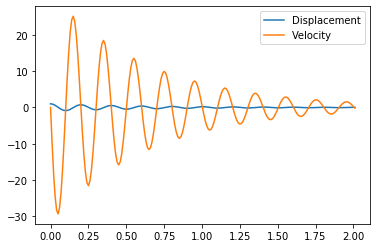

In [17]:
# Dynamical system parameters 
m = 1 # kg
k = 1.0e3 # N/m
print('Frequency [Hz]: ',np.sqrt(k/m)/(2*np.pi))
c = 0.05*np.sqrt(4*k*m) # Ns/m
# Time integration parameters
T = 2.0 # seconds
dt = 0.01 # seconds
# Initial conditions
z0 = np.array([1,0])
time_CN,sol_CN = solve_ode_CN(m,c,k,z0,T,dt)

plt.plot(time_CN,sol_CN[:,0],label='Displacement')
plt.plot(time_CN,sol_CN[:,1],label='Velocity')
plt.legend()
plt.show()

### Solution using higher order finite difference formulas

In [18]:
def solve_ode_HOFD(m,c,k,d0,v0,a0,T,dt):
  # Compute n
  n = int(T/dt)+1
  # Init solution
  disp = np.zeros(n+1)
  vel = np.zeros(n+1)
  acc = np.zeros(n+1)
  time = np.zeros(n+1)
  # Store initial condition
  disp[0] = d0
  vel[0] = v0
  acc[0] = a0
  # Intialize the terms
  a_term = (m/dt**2) + (c/(2*dt))
  b_term = (2*m/dt**2) - k
  c_term = (c/(2*dt)) - (m/dt**2)
  # Determine disp[1]
  disp_ini = ((1.0/a_term)*(b_term*disp[0] - c_term*dt*v0))/(1.0-c_term/a_term)
  # Time loop
  for loopA in range(1,n+1):
    # Update Displacement
    if(loopA == 1):
      disp[loopA] = (1.0/a_term)*(b_term*disp[loopA-1] + c_term*disp_ini)
    else:
      disp[loopA] = (1.0/a_term)*(b_term*disp[loopA-1] + c_term*disp[loopA-2])      
      vel[loopA-1] = (disp[loopA] - disp[loopA-2])/(2*dt)
      acc[loopA-1] = (disp[loopA] - 2*disp[loopA-1] + disp[loopA-2])/(dt**2)
      
    # Assign Time
    time[loopA] = dt*loopA
  return time,disp,vel,acc
    

Frequency [Hz]:  5.032921210448704


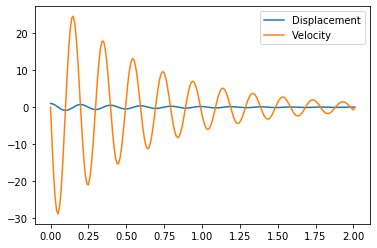

In [19]:
# Dynamical system parameters 
m = 1 # kg
k = 1.0e3 # N/m
print('Frequency [Hz]: ',np.sqrt(k/m)/(2*np.pi))
c = 0.05*np.sqrt(4*k*m) # Ns/m
# Time integration parameters
T = 2.0 # seconds
dt = 0.01 # seconds
# Initial conditions
d0 = 1.0
v0 = 0.0
a0 = 0.0
time_HOFD,disp,vel,acc = solve_ode_HOFD(m,c,k,d0,v0,a0,T,dt)

plt.plot(time_HOFD,disp,label='Displacement')
plt.plot(time_HOFD,vel,label='Velocity')
plt.legend()
plt.show()

### First order ODE system using RK4

In [20]:
def f(t,y):
  lambda_mat = np.array([[0,1],[-k/m,-c/m]])
  return lambda_mat.dot(y)

def solve_ode_RK4(m,c,k,z0,T,dt):
  # Compute n
  n = int(T/dt)+1
  # Init solution
  sol = np.zeros((n+1,2))
  time = np.zeros(n+1)
  # Store initial condition
  sol[0] = z0
  curr_time = dt
  # Time loop
  for loopA in range(1,n+1):  
    # Compute the kn
    k1 = f(curr_time,sol[loopA-1])
    k2 = f(curr_time + dt/2.0,sol[loopA-1]+(dt/2)*k1)
    k3 = f(curr_time + dt/2.0,sol[loopA-1]+(dt/2)*k2)
    k4 = f(curr_time + dt,sol[loopA-1]+dt*k3)
    # Upate solution
    sol[loopA] = sol[loopA-1] + (dt/6.0)*(k1+2*k2+2*k3+k4)
    time[loopA] = curr_time
    # Update current time
    curr_time += dt
  return time,sol
    

Frequency [Hz]:  5.032921210448704


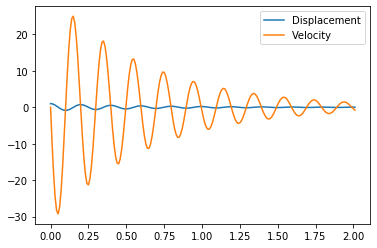

In [21]:
# Dynamical system parameters 
m = 1 # kg
k = 1.0e3 # N/m
print('Frequency [Hz]: ',np.sqrt(k/m)/(2*np.pi))
c = 0.05*np.sqrt(4*k*m) # Ns/m
# Time integration parameters
T = 2.0 # seconds
dt = 0.01 # seconds
# Initial conditions
z0 = np.array([1,0])
time_RK4,sol_RK4 = solve_ode_RK4(m,c,k,z0,T,dt)

plt.plot(time_RK4,sol_RK4[:,0],label='Displacement')
plt.plot(time_RK4,sol_RK4[:,1],label='Velocity')
plt.legend()
plt.show()

Frequency [Hz]:  5.032921210448704


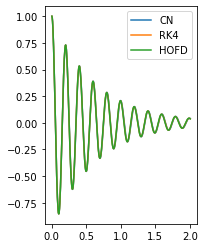

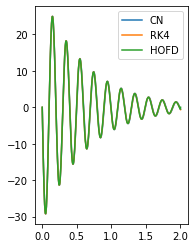

In [25]:
# Dynamical system parameters 
m = 1 # kg
k = 1.0e3 # N/m
print('Frequency [Hz]: ',np.sqrt(k/m)/(2*np.pi))
c = 0.05*np.sqrt(4*k*m) # Ns/m
# Time integration parameters
T = 2.0 # seconds
dt = 0.005 # seconds

# CN
z0 = np.array([1,0])
time_CN,sol_CN = solve_ode_CN(m,c,k,z0,T,dt)

# HOFD
d0 = 1.0
v0 = 0.0
a0 = 0.0
time_HOFD,disp,vel,acc = solve_ode_HOFD(m,c,k,d0,v0,a0,T,dt)

# RK4
z0 = np.array([1,0])
time_RK4,sol_RK4 = solve_ode_RK4(m,c,k,z0,T,dt)

# Plot all the solutions together
plt.subplot(1,2,1) 
plt.plot(time_CN,sol_CN[:,0],label='CN')
plt.plot(time_RK4,sol_RK4[:,0],label='RK4')
plt.plot(time_HOFD,disp,label='HOFD')
plt.legend()
plt.show()

plt.subplot(1,2,2) 
plt.plot(time_CN,sol_CN[:,1],label='CN')
plt.plot(time_RK4,sol_RK4[:,1],label='RK4')
plt.plot(time_HOFD,vel,label='HOFD')
plt.legend()
plt.show()